# HANDLING WITH OUTLIERS

In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import seaborn as sns

In [52]:
df = pd.read_csv('Capstone_project_step2_Ahmet')
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15915,Renault Espace,Van,39885,VAT deductible,9900.000000,1.0,165.0,Used,2019.0,Grey,...,1798.0,4.0,Benzine,1682.0,6.0,Alloy wheels,7.0,7.4,9.2,6.3
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15917,Renault Espace,Van,39700,VAT deductible,10.000000,1.0,147.0,Pre-registered,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


In [53]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0,63668.0,62111.0,14986.0,57000.0,16103.0,...,3500.0,8500.0,100.0,34130.127828,1000.0,34130.127828,9900.0,15.0,10.0,34130.127828
prev_owner,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hp,66.0,141.0,85.0,66.0,66.0,85.0,85.0,66.0,85.0,70.0,...,147.0,165.0,118.0,147.0,165.0,147.0,165.0,146.0,147.0,165.0
type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Demonstration,Demonstration,Pre-registered,New,Demonstration,New,Used,Pre-registered,Pre-registered,Demonstration
first_registration,2016.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2017.0,...,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
body_color,Black,Red,Black,Brown,Black,White,White,Red,Grey,White,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey


### KM

In [54]:
Q1 = df.km.describe().loc["25%"]
Q3 = df.km.describe().loc["75%"]
IQR = Q3-Q1
IQR

40461.5

In [55]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 3*IQR
lower_lim, upper_lim

(-54255.25, 168283.0)

Negative odeometer value is not reasonable, that is why it is substitited with 0, and to conserve data, extreme limits are changed as 3 instead of 1.5.

In [56]:
lower_lim = 0

In [57]:
drop_index = df.loc[((df.km < lower_lim) | (df.km > upper_lim))].index 
drop_index

Int64Index([   63,  2813,  2851,  2940,  2963,  2968,  2973,  2985,  2987,
             2996,  3002,  3003,  3082,  3117,  3158,  3218,  3227,  3228,
             3229,  3230,  3475,  5712,  6047,  6052,  6056,  6060,  6062,
             6067,  6115,  6224,  6234,  6238,  6245,  6246,  6257,  6260,
             6267,  6301,  6316,  6365,  6380,  6385,  6387,  6394,  6399,
             6401,  8824,  8827,  9279, 10457, 10481, 10489, 10495, 10501,
            10502, 10504, 10750, 10771, 10795, 10800, 10804, 10806, 10808,
            10817, 10819, 10842, 10843, 10845, 10846, 10847, 10848, 10853,
            10854, 10856, 10865, 10875, 11134, 11166, 11170, 11171, 11179,
            15277, 15278, 15283, 15314, 15320],
           dtype='int64')

C:\Users\iayav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

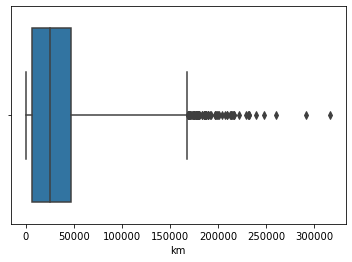

In [58]:
sns.boxplot(df.km , whis = 3)

In [59]:
df = df.loc[~((df.km < lower_lim) | (df.km > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15915,Renault Espace,Van,39885,VAT deductible,9900.000000,1.0,165.0,Used,2019.0,Grey,...,1798.0,4.0,Benzine,1682.0,6.0,Alloy wheels,7.0,7.4,9.2,6.3
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15917,Renault Espace,Van,39700,VAT deductible,10.000000,1.0,147.0,Pre-registered,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### Previous Owner

In [60]:
df.prev_owner.describe()

count    15833.000000
mean         1.079833
std          0.281110
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: prev_owner, dtype: float64

In [61]:
df.prev_owner.value_counts()

1.0    14611
2.0     1182
3.0       38
4.0        2
Name: prev_owner, dtype: int64

In [62]:
Q1 = df.prev_owner.describe().loc["25%"]
Q3 = df.prev_owner.describe().loc["75%"]
IQR = Q3-Q1
IQR

0.0

In [63]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 3*IQR
lower_lim, upper_lim

(1.0, 1.0)

Because of right-skewness of the data (concentration on value "1") , outlier analysis is unsuccessful. No elimination will take place.

### Horsepower

In [64]:
Q1 = df.hp.describe().loc["25%"]
Q3 = df.hp.describe().loc["75%"]
IQR = Q3-Q1
IQR

34.0

In [65]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(15.0, 151.0)

In [66]:
drop_index = df.loc[((df.hp < lower_lim) | (df.hp > upper_lim))].index
drop_index

Int64Index([ 3353,  3587,  3590,  3592,  3593,  3594,  3595,  3596,  3597,
             3598,
            ...
            15897, 15900, 15903, 15905, 15907, 15908, 15910, 15913, 15915,
            15918],
           dtype='int64', length=428)

In [67]:
df = df.loc[~((df.hp < lower_lim) | (df.hp > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### First Registration

In [68]:
Q1 = df.first_registration.describe().loc["25%"]
Q3 = df.first_registration.describe().loc["75%"]
IQR = Q3-Q1
IQR

2.0

In [69]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(2014.0, 2022.0)

In [70]:
drop_index = df.loc[((df.first_registration < lower_lim) | (df.first_registration > upper_lim))].index
drop_index

Int64Index([], dtype='int64')

There is no outlier in registration.

## Number of Doors

In [71]:
Q1 = df.nr_of_doors.describe().loc["25%"]
Q3 = df.nr_of_doors.describe().loc["75%"]
IQR = Q3-Q1
IQR

1.0

In [72]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(2.5, 6.5)

In [73]:
drop_index = df.loc[((df.nr_of_doors < lower_lim) | (df.nr_of_doors > upper_lim))].index
drop_index

Int64Index([   26,    44,    48,    55,    56,    93,   160,   221,   234,
              273,
            ...
            10296, 10297, 10300, 10304, 10314, 10380, 10413, 10444, 13782,
            15202],
           dtype='int64', length=219)

In [74]:
df = df.loc[~((df.nr_of_doors < lower_lim) | (df.nr_of_doors > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


## Number of Seats

In [75]:
Q1 = df.nr_of_seats.describe().loc["25%"]
Q3 = df.nr_of_seats.describe().loc["75%"]
IQR = Q3-Q1
IQR

0.0

The data is concentrated on a single value. Dropping the other values out will not have a significant change. To have a better insight, they are kept.

### Displacement

In [76]:
Q1 = df.displacement.describe().loc["25%"]
Q3 = df.displacement.describe().loc["75%"]
IQR = Q3-Q1
IQR

369.0

In [77]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(675.5, 2151.5)

In [78]:
drop_index = df.loc[((df.displacement < lower_lim) | (df.displacement > upper_lim))].index
drop_index

Int64Index([ 7169,  7809,  7810,  7811,  7812,  8128, 10194, 10559, 10932,
            12467, 12473, 12484, 12499, 12501, 12554, 12604, 12670, 12750,
            12768, 12769, 12781, 12783, 12786, 12790, 12796, 12798, 12800,
            12815, 12823, 12835, 12848, 12849, 13904, 13912, 14198, 14284,
            14314, 14315, 14319, 14320, 14321, 14322, 14324, 14325, 14326,
            14327, 14328, 15574, 15575, 15576, 15577, 15578, 15579],
           dtype='int64')

In [79]:
df = df.loc[~((df.displacement < lower_lim) | (df.displacement > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### Cylinders

In [80]:
Q1 = df.cylinders.describe().loc["25%"]
Q3 = df.cylinders.describe().loc["75%"]
IQR = Q3-Q1
IQR

0.0

The data is concentrated on a single value. Dropping the other values out will not have a significant change. To have a better insight, they are kept.

### CO2 Emission

In [81]:
Q1 = df.co_2_emission.describe().loc["25%"]
Q3 = df.co_2_emission.describe().loc["75%"]
IQR = Q3-Q1
IQR

210.0

In [82]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(737.0, 1577.0)

In [83]:
drop_index = df.loc[((df.co_2_emission < lower_lim) | (df.co_2_emission > upper_lim))].index
drop_index

Int64Index([  535,  3612,  3615,  3617,  4089,  4556,  5814,  5818,  5859,
             5902,
            ...
            15299, 15643, 15644, 15821, 15842, 15852, 15863, 15875, 15878,
            15890],
           dtype='int64', length=162)

According to iqr analysis, almost half of the data should be eliminated. Let's narrow the whisks

In [84]:
lower_lim = Q1 - 1*IQR
upper_lim = Q3 + 1*IQR
lower_lim, upper_lim

(842.0, 1472.0)

In [85]:
drop_index = df.loc[((df.co_2_emission < lower_lim) | (df.co_2_emission > upper_lim))].index
drop_index

Int64Index([  535,  3612,  3615,  3617,  4089,  4556,  5814,  5818,  5820,
             5859,
            ...
            15844, 15852, 15858, 15863, 15871, 15874, 15875, 15877, 15878,
            15890],
           dtype='int64', length=683)

In [86]:
df = df.loc[~((df.co_2_emission < lower_lim) | (df.co_2_emission > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### Emission Class

In [87]:
Q1 = df.emission_class.describe().loc["25%"]
Q3 = df.emission_class.describe().loc["75%"]
IQR = Q3-Q1
IQR

0.0

This data is also concentrated. No need to make adjustments.|

### Consumption(Combined)

In [88]:
Q1 = df.cons_comb.describe().loc["25%"]
Q3 = df.cons_comb.describe().loc["75%"]
IQR = Q3-Q1
IQR

1.1000000000000005

In [89]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(2.449999999999999, 6.850000000000001)

In [90]:
drop_index = df.loc[((df.cons_comb < lower_lim) | (df.cons_comb > upper_lim))].index
drop_index

Int64Index([  500,  2194,  2196,  2210,  2237,  2801,  4102,  4558,  5161,
             7654,  8268,  8270,  8319,  8321,  8326, 11954, 13179, 13678,
            13894, 14530, 14584, 15067, 15684, 15906],
           dtype='int64')

In [91]:
df = df.loc[~((df.cons_comb < lower_lim) | (df.cons_comb > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### Consumption(City)

In [92]:
Q1 = df.cons_city.describe().loc["25%"]
Q3 = df.cons_city.describe().loc["75%"]
IQR = Q3-Q1
IQR

1.6999999999999993

In [93]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(2.3500000000000014, 9.149999999999999)

In [94]:
drop_index = df.loc[((df.cons_city < lower_lim) | (df.cons_city > upper_lim))].index
drop_index

Int64Index([5693, 9756, 10322], dtype='int64')

In [95]:
df = df.loc[~((df.cons_city < lower_lim) | (df.cons_city > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


### Consumption(Country)

In [96]:
Q1 = df.cons_country.describe().loc["25%"]
Q3 = df.cons_country.describe().loc["75%"]
IQR = Q3-Q1
IQR

0.7000000000000002

In [97]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(2.65, 5.450000000000001)

In [98]:
drop_index = df.loc[((df.cons_country < lower_lim) | (df.cons_country > upper_lim))].index
drop_index

Int64Index([ 1644,  1839,  4894,  6826,  7379,  7647,  8623,  8644,  8646,
             8648,  9147,  9220,  9268,  9538,  9581,  9582,  9583,  9585,
             9587,  9597,  9611,  9686,  9711,  9719,  9879,  9975, 10058,
            10078, 10079, 10184, 10191, 10192, 10309, 10764, 12443, 12479,
            12537, 12659, 12727, 12734, 12746, 12758, 12759, 12776, 12793,
            12810, 12816, 12951, 12953, 12995, 13112, 13121, 13235, 14064,
            14318, 14965, 15199, 15256],
           dtype='int64')

In [99]:
df = df.loc[~((df.cons_country < lower_lim) | (df.cons_country > upper_lim))] 
df

,make_model,body_type,price,vat,km,prev_owner,hp,type,first_registration,body_color,...,displacement,cylinders,fuel,co_2_emission,emission_class,extras,gears,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,2.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,7.0,3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,1.0,141.0,Used,2017.0,Red,...,1798.0,4.0,Benzine,1292.0,6.0,Alloy wheels,7.0,5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,1.0,85.0,Used,2016.0,Black,...,1598.0,4.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.4,3.4
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,1.0,66.0,Used,2016.0,Brown,...,1422.0,3.0,Diesel,992.0,6.0,Alloy wheels,6.0,3.8,4.3,3.5
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,1.0,66.0,Used,2016.0,Black,...,1422.0,3.0,Diesel,1092.0,6.0,Alloy wheels,7.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Renault Espace,Van,39980,VAT deductible,100.000000,1.0,118.0,Pre-registered,2019.0,White,...,1598.0,4.0,Diesel,1232.0,6.0,Alloy wheels,6.0,4.7,5.1,4.4
15912,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Black,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15914,Renault Espace,Van,39950,VAT deductible,34130.127828,1.0,147.0,New,2019.0,Grey,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.000000,1.0,146.0,Pre-registered,2019.0,White,...,1997.0,4.0,Diesel,1392.0,6.0,Alloy wheels,6.0,5.3,6.2,4.7


In [100]:
df.to_csv("Capstone_project_step3_Ahmet", encoding='utf-8', index=False)